# Exercice d'analyse de données

Le but de ce petit exercice est de montrer une utilisation simple d'un processus d'analyse de données géographiques. En l'occurrence, on va faire un clustering simple des 318 communes vaudoises sur la base de quelques indicateurs.

Nous allons utiliser [Pandas](http://pandas.pydata.org), respectivement [GeoPandas](http://geopandas.org), et [scikit-learn](http://scikit-learn.org) pour le clustering. À la fin, nous aurons une petite carte montrant les clusters trouvés.

Pour l'installation de tous les modules Python nécessaires, le plus simple est de commencer avec une installation comme [Anaconda](https://www.continuum.io/downloads) ou [Enthought Canopy](https://www.enthought.com/products/canopy/). Avec un tel environnement, on peut installer les modules supplémentaires simplement avec `pip`, p.ex.

    pip install geopandas

Il faut tout de même noter que parfois les modules Python supplémentaires doivent être compilés. Ceci peut donner des erreurs inatendus et peut du coup être assez frustrant. À part aller boire une bière, chercher dans votre moteur de recherche favori ([DuckDuckGo](https://duckduckgo.com) bien sûr) et demander à quelqu'un, il n'y a pas trop de conseil à donner. Sauf que c'est généralement un poil plus simple dans Linux, et un peu moins avec OSX (utiliser Homebrew peut aider), et pas du tout avec Windows (utiliser PowerShell dans tous les cas).

## 1. Lecture des données avec Pandas

D'abord nous devons importer Pandas:

In [1]:
import pandas as pd

La lecture du fichier TSV/CSV est très simple avec la fonction `read_csv`. Il faut juste donner le séparateur (`\t` est un tabulateur), et dire que les valeurs manquantes sont représentées par `ND`. Nous avons en retour un *data frame* de Pandas (d'où le nom de variable `df`).

In [13]:
df = pd.read_csv('exercice-data-analysis-data/cmnes_vd_data.tsv', sep="\t", na_values='ND')

Il est bien de vérifier un peu ce qui c'est passé. Nous pouvons facilement obtenir la liste des variables:

In [14]:
df.columns

Index([u'geocode', u'commune', u'pop_natio_dens_2015',
       u'pop_natio_part_etr_2015', u'pop_natio_part_natifs_2010',
       u'pop_natio_pop_31_12_2015', u'pop_age_taux_dep_2015',
       u'pop_age_ind_fecond_2015', u'pop_evol_taux_1950_2000',
       u'pop_evol_taux_2000_2010', u'pop_mouv_tx_natur_2010',
       u'envir_tx_dechet_2010', u'agricult_part_sau_2010',
       u'loge_vac_tx_vac_2015', u'transports_tx_vehic_2014',
       u'sante_divers_tx_hospit_2014', u'infraction_tx_code_2015'],
      dtype='object')

... ainsi qu'un aperçu rapide des données:

In [15]:
df.describe()

,geocode,pop_natio_dens_2015,pop_natio_part_etr_2015,pop_natio_part_natifs_2010,pop_natio_pop_31_12_2015,pop_age_taux_dep_2015,pop_age_ind_fecond_2015,pop_evol_taux_1950_2000,pop_evol_taux_2000_2010,pop_mouv_tx_natur_2010,envir_tx_dechet_2010,agricult_part_sau_2010,loge_vac_tx_vac_2015,transports_tx_vehic_2014,sante_divers_tx_hospit_2014,infraction_tx_code_2015
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,312.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,5664.600629,408.990566,20.134591,3.717610,2413.512579,65.413522,0.610128,1.022044,1.498333,2.475283,433.965409,55.016352,1.105283,628.842767,117.088050,45.680818
std,156.886970,888.545052,10.196802,4.881188,8305.587816,8.474011,0.140360,1.197334,1.095395,4.661773,114.349851,30.686842,1.549193,90.165291,73.250392,38.272494
min,5401.000000,12.100000,0.000000,0.000000,49.000000,38.500000,0.180000,-1.290000,-0.810000,0.000000,147.000000,0.000000,0.000000,337.000000,0.000000,0.000000
25%,5529.250000,67.225000,12.500000,1.100000,373.500000,60.025000,0.520000,0.145000,0.710000,0.000000,364.000000,34.250000,0.000000,585.000000,94.000000,22.875000
50%,5662.500000,125.000000,18.000000,2.400000,777.000000,64.850000,0.590000,0.720000,1.410000,1.530000,428.500000,54.800000,0.565000,625.000000,125.000000,37.700000
75%,5788.750000,337.750000,26.550000,4.275000,1841.750000,71.475000,0.690000,1.847500,2.130000,2.997500,495.500000,71.700000,1.535000,666.750000,151.750000,56.400000
max,5939.000000,8074.000000,60.400000,32.400000,134937.000000,98.500000,1.330000,4.670000,5.530000,60.000000,1013.000000,231.000000,9.430000,1266.000000,580.000000,408.000000


## 2. Clustering (DBSCAN)

Nous allons faire un clustering avec scikit-learn. Vous pouvez consulter la documentation des [méthodes de clustering de scikit-learn](http://scikit-learn.org/stable/modules/clustering.html) afin d'apprendre un peu plus sur DBSCAN, l'algorithme de clustering que nous allons essayer.

Nous important l'algorithme de clustering (et seulement lui). Et nous important également Numpy que nous allons utiliser un peu plus tard pour quelques manipulations de données:

In [27]:
from sklearn.cluster import DBSCAN
import numpy as np

La première chose que nous faisons est remplacer les valeurs manquantes par la valeur `0.0` (il suffit d'écrire `0.` dans Python). Et puis nous faisons une extraction des colonnes de sorte à ce que les deux premières colonnes tombent. Cette magie peut être faite avec `df1.values[:, 2:]`. La syntaxe `:` veut dire *"prend toutes les valeurs"*, et la syntaxe `2:` *"prend tout à partir de la 3ème valeur"*. Un tableau de données est en fait un array à 2 dimension, et la valeur avant la virgule dans `[:, 2:]` correspond aux lignes, et la deuxième valeur aux colonnes.

En même temps, nous transformons toutes les valeurs en `float`, à l'aide de la fonction `array` de Numpy:

In [28]:
df1 = df.fillna(0.)
x = np.array(df1.values[:,2:], dtype=np.float64)

Et maintenant nous effectuons le clustering. Nous nous limitons sur 3 colonnes (c'est le `x[:, 1:4]` ce qui correspond aux colonnes 2 à 4). Le `eps` est un paramètre de l'algorithme (paramètre de voisinage), tout comme `min_samples`. Les valeurs de ces paramètres peuvent être obtenus après quelques essais.

In [29]:
db = DBSCAN(eps=20., min_samples=10).fit(x[:,1:4])

Le clustering est fait de manière très rapide et de manière peu spéctaculaire... Les classes peuvent être obtenus avec `db.labels_`. Nous les ajoutons directement dans notre data frame:

In [36]:
df['dbclusters'] = db.labels_

Il est une bonne idée de jeter un coup d'oeil aux labels des classes:

In [30]:
db.labels_

array([-1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1, -1,
        3,  2, -1,  1, -1, -1,  1,  1,  2,  3, -1, -1,  1,  1, -1, -1, -1,
       -1, -1,  1, -1,  1,  0,  2, -1,  1,  1, -1,  0,  4,  2, -1,  1,  4,
        1, -1, -1,  2,  1, -1,  1, -1, -1, -1, -1, -1,  1,  0, -1, -1,  4,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  4,  3,  3,  1, -1, -1, -1,
        4, -1, -1,  4,  3, -1,  4, -1,  1,  1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1,  3,  3, -1, -1,  1, -1,  1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  0, -1,
       -1, -1,  1, -1,  1,  0,  0,  0,  0, -1,  2, -1,  0,  1,  0, -1, -1,
        2,  0, -1, -1,  0,  0,  3, -1,  0, -1, -1, -1, -1,  4, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1,  2, -1, -1,  4, -1,  0, -1, -1,  0,  1,
        1,  2,  1,  1, -1

Nous avons beaucoup de `-1`, et queques autres valeurs. La valeur `-1` nous indique que la commune correspondante n'a pas pu être mise dans un cluster (c'est du *"bruit"*). Sinon nous avons des valeurs de 0 à 4, donc 5 classes.

## 3. Cartographie

Nous allons quand-même faire une carte rapide avec le résultat du clustering. Nous allons lire d'abord le fichier Shape des communes vaudoises avec GeoPandas (que nous devons importer d'abord):

In [42]:
import geopandas as gp
cmnes = gp.GeoDataFrame.from_file('exercice-data-analysis-data/vec200_cmnes_vd_2015.shp')
cmnes

,BEZIRKSNR,BFSNR,COUNTRY,DATEOFCHNG,GEMFLAECHE,GEMNAME,GEMTEIL,KANTONSNR,OBJORIG,OBJORIG_YE,OBJVAL,SEEFLAECHE,SEENAME,SEENR,SHN,UUID,geometry
0,2227,5649,CH,2015-01-26,159,Tolochenaz,0,22,TLM,2015,Gemeinde,-29998,N/A,0,CH22275649,{486DA3EC-3070-420B-8386-A45D62C23A8D},"POLYGON ((526371 151317, 526499 150953, 526975..."
1,2227,5645,CH,2015-01-26,176,Romanel-sur-Morges,0,22,TLM,2015,Gemeinde,-29998,N/A,0,CH22275645,{0FB662C7-4F10-4A59-99AE-F68077737E4C},"POLYGON ((528759 156916, 528808 157063, 528978..."
2,2227,5477,CH,2015-01-26,828,Cossonay,0,22,TLM,2015,Gemeinde,-29998,N/A,0,CH22275477,{14F7DE83-FAC4-4B76-B1F4-890811CC67B0},"POLYGON ((529027 164890, 529160 164830, 529116..."
3,2227,5632,CH,2015-01-26,166,Denges,0,22,TLM,2015,Gemeinde,-29998,N/A,0,CH22275632,{3388215E-7447-44B6-87DC-08793EC0E383},"POLYGON ((530692 153612, 530864 153658, 531072..."
4,2224,5907,CH,2015-01-26,400,Chavannes-le-Chêne,0,22,TLM,2015,Gemeinde,-29998,N/A,0,CH22245907,{AD949646-056C-4F39-8438-1DB452E8C441},"POLYGON ((549974 182609, 550612 181915, 551083..."
5,2228,5712,CH,2015-01-26,187,Coppet,0,22,TLM,2015,Gemeinde,-29998,N/A,0,CH22285712,{01F4A982-F786-4A6B-9543-71854B32F4F7},"POLYGON ((504675 131184, 504605 131024, 504526..."
6,2223,5480,CH,2015-01-26,552,Daillens,0,22,TLM,2015,Gemeinde,-29998,N/A,0,CH22235480,{646A6F97-740E-4AB2-87A4-32A50FB0769F},"POLYGON ((532582 166553, 532469 166370, 532625..."
7,2230,5843,CH,2015-01-26,4855,Rougemont,0,22,TLM,2015,Gemeinde,-29998,N/A,0,CH22305843,{772FD35D-8B49-4ECD-90C6-72E3A903EE37},"POLYGON ((584553.6412499994 155028.0512499996,..."
8,2226,5613,CH,2015-01-26,965,Bourg-en-Lavaux,0,22,TLM,2015,Gemeinde,1,N/A,0,CH22265613,{F8CCF2C9-FA30-4AC8-A3BA-441F78E753CE},"POLYGON ((545468 152210, 545940 151785, 546440..."
9,2222,5686,CH,2015-01-26,143,Sarzens,0,22,TLM,2015,Gemeinde,-29998,N/A,0,CH22225686,{37A027AA-EF04-401B-9EDE-1098C4F05437},"POLYGON ((555315 171145, 555315 171105, 555285..."


Nous devons fusionner le deux *data frames* dans un seul. C'est-à-dire nous faisons une jointure directement dans Pandas sur la base du numéro de commune qui est présent dans les deux *data frames*. Il est important que le *data frame* des commune soit le premier (celui de gauche), car il est en même temps un *data frame GeoPandas* (qui est une sous-classe du data frame Pandas).

In [44]:
df2 = pd.merge(left=cmnes, right=df, left_on='BFSNR', right_on='geocode')

Vérifier que ça c'est bien passé:

In [38]:
df2.describe()

,BEZIRKSNR,BFSNR,GEMFLAECHE,GEMTEIL,KANTONSNR,SEEFLAECHE,SEENR,geocode,pop_natio_dens_2015,pop_natio_part_etr_2015,...,pop_evol_taux_1950_2000,pop_evol_taux_2000_2010,pop_mouv_tx_natur_2010,envir_tx_dechet_2010,agricult_part_sau_2010,loge_vac_tx_vac_2015,transports_tx_vehic_2014,sante_divers_tx_hospit_2014,infraction_tx_code_2015,dbclusters
count,318.000000,318.000000,318.000000,318.000000,318,318.000000,318,318.000000,318.000000,318.000000,...,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,2225.188679,5664.600629,483.449686,0.028302,22,-28582.874214,0,5664.600629,408.990566,20.134591,...,1.022044,1.498333,2.475283,433.965409,55.016352,1.105283,628.842767,117.088050,45.680818,-0.106918
std,2.465330,156.886970,3681.300954,0.229835,0,6370.223342,0,156.886970,888.545052,10.196802,...,1.197334,1.095395,4.661773,114.349851,30.686842,1.549193,90.165291,73.250392,38.272494,1.312840
min,2221.000000,5401.000000,-29998.000000,0.000000,22,-29998.000000,0,5401.000000,12.100000,0.000000,...,-1.290000,-0.810000,0.000000,147.000000,0.000000,0.000000,337.000000,0.000000,0.000000,-1.000000
25%,2223.000000,5529.250000,291.000000,0.000000,22,-29998.000000,0,5529.250000,67.225000,12.500000,...,0.145000,0.710000,0.000000,364.000000,34.250000,0.000000,585.000000,94.000000,22.875000,-1.000000
50%,2224.000000,5662.500000,479.000000,0.000000,22,-29998.000000,0,5662.500000,125.000000,18.000000,...,0.720000,1.410000,1.530000,428.500000,54.800000,0.565000,625.000000,125.000000,37.700000,-1.000000
75%,2227.000000,5788.750000,900.000000,0.000000,22,-29998.000000,0,5788.750000,337.750000,26.550000,...,1.847500,2.130000,2.997500,495.500000,71.700000,1.535000,666.750000,151.750000,56.400000,1.000000
max,2230.000000,5939.000000,11372.000000,2.000000,22,8.000000,0,5939.000000,8074.000000,60.400000,...,4.670000,5.530000,60.000000,1013.000000,231.000000,9.430000,1266.000000,580.000000,408.000000,4.000000


La visualisation peut se faire avec GeoPandas qui utilise Matplotlib en réalité. Du coup, nous créons d'abord une figure Matplotlib, nous faisons le plot avec `df2.plot` et nous affichons le tout.

Dans un Jupyter Notebook, nous ajoutons la première ligne `%matplotlib inline` pour que la figure s'affiche directement en dessous.

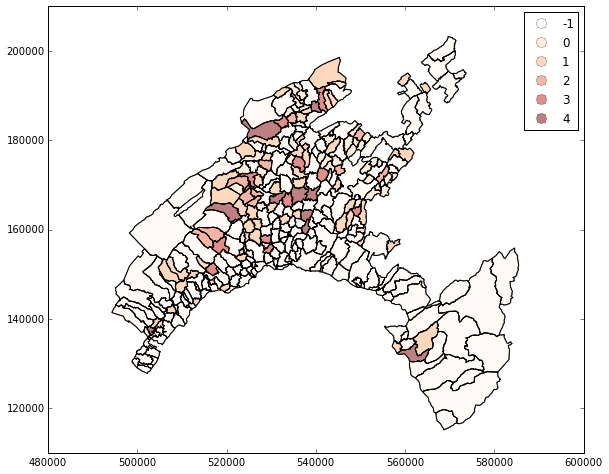

In [39]:
%matplotlib inline
from matplotlib import pyplot
fig = pyplot.figure(1, figsize=(20, 8), dpi=180)
df2.plot(column="dbclusters", colormap="OrRd", categorical=True, legend=True)
pyplot.show()

On a vu mieux comme carte évidemment, mais pour une simple inspection c'est tout à fait suffisant.

On se rend compte que beaucoup de communes ne se retrouvent pas dans un cluster. Une analyse plus approfondie devrait permettre de voir ce qui passe au niveau de ces clusters. Un bon début peut être d'exporter le nouveau *data frame* et de regarder un peu mieux dans un logiciel SIG:

In [47]:
df2.to_csv('cmnes_vd_clustering.csv', sep='\t', encoding='utf-8')